<a href="https://colab.research.google.com/github/ReshmaMasutha/Linear-Algebra-The-Coding-Way/blob/main/eigenvalues%20and%20eigenvectors/EigenValuesVectors_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

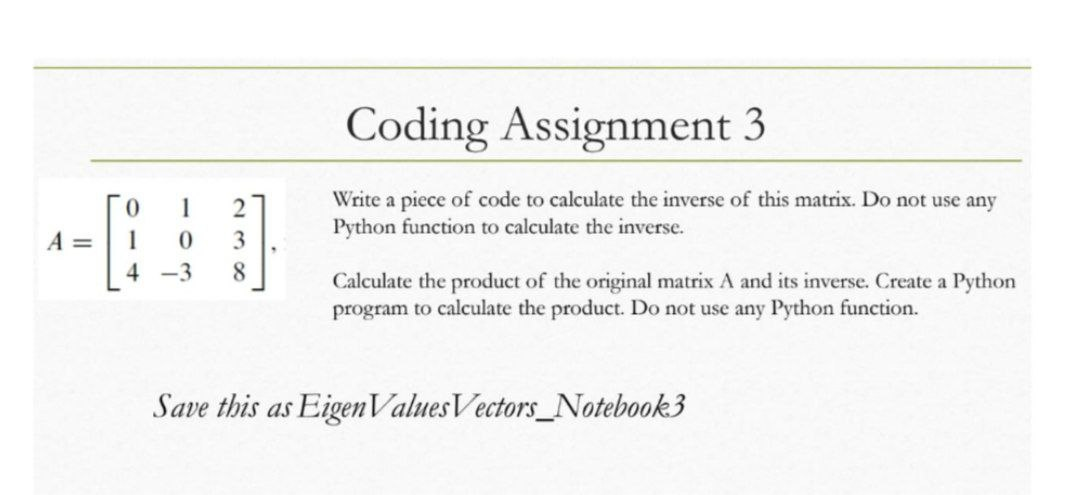

**Solution for the problem:**


**Step 1-Calculate the Inverse of Matrix A:**
Use a method such as Gaussian elimination or cofactor expansion to compute the inverse of the original matrix A.

**Step 2-Define Matrix Multiplication Function:**
Define a function to perform matrix multiplication. This function should take two matrices as input and return their product.

**Step 3-Multiply Matrix A with its Inverse:**
Use the matrix multiplication function to multiply the original matrix A with its computed inverse.

**Step 4-Output the Result:**Print or display the resulting product matrix.

In [9]:
import numpy as np

In [10]:
def transpose(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    return [[matrix[j][i] for j in range(rows)] for i in range(cols)]

**Note:**
This function calculates the transpose of a matrix. It iterates over the rows and columns of the input matrix and constructs a new matrix where rows become columns and vice versa.

In [11]:
def cofactor(matrix, i, j):
    return [row[:j] + row[j+1:] for row in (matrix[:i]+matrix[i+1:])]

**Note:**The 'cofactor' function calculates the cofactor of a matrix for a given row and column. It removes the row and column specified by the input indices and returns the remaining matrix.

In [12]:
def determinant(matrix):
    if len(matrix) == 2:
        return matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]
    det = 0
    for c in range(len(matrix)):
        det += ((-1)**c)*matrix[0][c]*determinant(cofactor(matrix,0,c))
    return det

**Note:**This function calculates the determinant of a matrix recursively using cofactor expansion. If the matrix is a 2x2 matrix, it directly computes the determinant using the formula ad - bc. Otherwise, it iterates over the elements of the first row, calculating the determinant of each minor matrix (obtained by removing the current element's row and column) and adding/subtracting them with alternating signs.

In [14]:
def inverse(matrix):
    det = determinant(matrix)
    if det == 0:
        return "The matrix is singular, cannot find its inverse."
    n = len(matrix)
    adj = []
    for i in range(n):
        adj_row = []
        for j in range(n):
            adj_row.append(((-1)**(i+j)) * determinant(cofactor(matrix, i, j)))
        adj.append(adj_row)
    adj_transpose = transpose(adj)
    return [[adj_transpose[i][j]/det for j in range(n)] for i in range(n)]

**Note:**The inverse function computes the inverse of a matrix. It first calculates the determinant of the input matrix. If the determinant is zero, it returns a message indicating that the matrix is singular (non-invertible). Otherwise, it computes the adjugate (adjoint) matrix by calculating the cofactor matrix and taking its transpose. Finally, it computes the inverse matrix by dividing each element of the adjugate matrix by the determinant.

In [16]:
def matrix_multiply(matrix1, matrix2):
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix2[0])):
            sum = 0
            for k in range(len(matrix2)):
                sum += matrix1[i][k] * matrix2[k][j]
            row.append(sum)
        [].append(row)
    return []

**Note:**This function calculates the product of two matrices. It takes two matrices as input and returns their product. It iterates over the rows of the first matrix and the columns of the second matrix, calculating the dot product of corresponding rows and columns to populate the resulting matrix.

In [17]:
# Given matrix A
A = [[0, 1, 2], [1, 0, 3], [4, -3, 8]]

 **Note:**This line defines the given matrix A.

In [18]:
A_inverse = inverse(A)

**Note:**This line calculates the inverse of matrix A using the 'inverse' function.

In [22]:
print(inverse(A))

[[-4.5, 7.0, -1.5], [-2.0, 4.0, -1.0], [1.5, -2.0, 0.5]]


In [19]:
product = matrix_multiply(A, A_inverse)

**Note:**This line calculates the product of matrix A and its inverse using the 'matrix_multiply' function.

In [21]:
print("Product of A and its inverse:")
for row in product:
    print(row)

Product of A and its inverse:
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
